![logo](banner.jpg)

<h1><center><span style="color:blue">TASCA 6A - IT Academy</span></center></h1>
<h2><center><span style="color:blue">Curs Data Science</span></center></h2>

In [598]:
import numpy as np
from numpy import random
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import re
import altair as alt
from vega_datasets import data

In [599]:
import warnings
warnings.filterwarnings('ignore')

### <span style="color:black">Exercici 1.</span>

__Realitza la pràctica del punt "Ejercicio Práctico - Scatter Plots" del notebook del professor a GitHub "02 EXAMINING DATA" amb seaborn i el dataset "tips":__ <span style="color:blue">__[X] Fet__</span>

__1. Una variable categòrica (UniqueCarrier)__

In [600]:
tips = pd.read_csv('tips.csv', sep = ',', encoding = 'utf-8')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [601]:
#calculamos el porcentaje de propinas con respecto el importe de la factura

tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


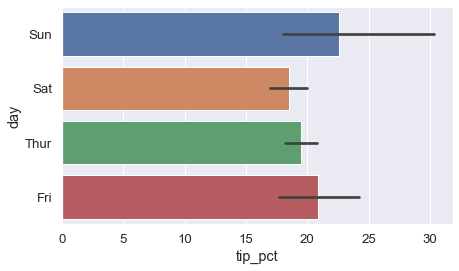

In [607]:
#Vemos que el día que, proporcionalmente al importe de la factura, se dan más propinas es el domingo
sns.set(rc={'figure.figsize':(7,4)}, font_scale=1.2)
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

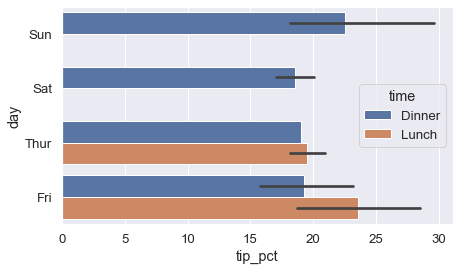

In [608]:
#Vemos que el turno en el que, proporcionalmente al importe de la factura, se dan más propinas es el vienes  al mediodía
sns.set(rc={'figure.figsize':(7,4)}, font_scale=1.2)
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")

In [604]:
round((tips['tip']).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

In [605]:
(tips['tip']).median().round(3)

2.9

__1. Una variable numèrica__

<AxesSubplot:ylabel='tip_pct'>

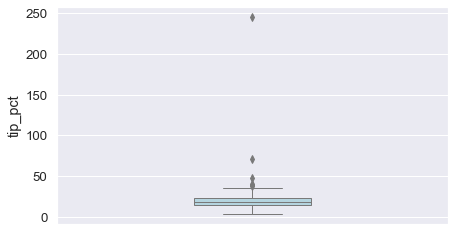

In [609]:
sns.set(rc={'figure.figsize':(7,4)}, font_scale=1.2)
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)

__2. Una variable numèrica i una categòrica__

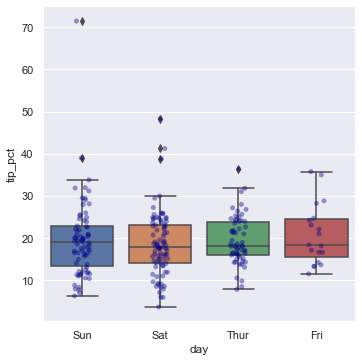

In [141]:
# añadimos variable categorica 'day' en x:

ax = sns.catplot(x='day', y='tip_pct', kind='box',data=tips[tips.tip_pct < 245])
ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4)

__3. Tres variables (2 categóricas y 1 numérica)__

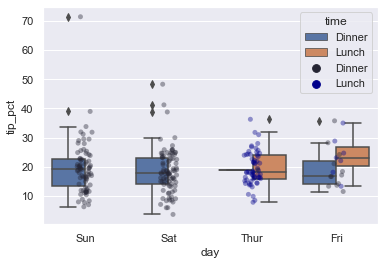

In [142]:
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

__4. Cuatro variables (3 categóricas y 1 numérica)__

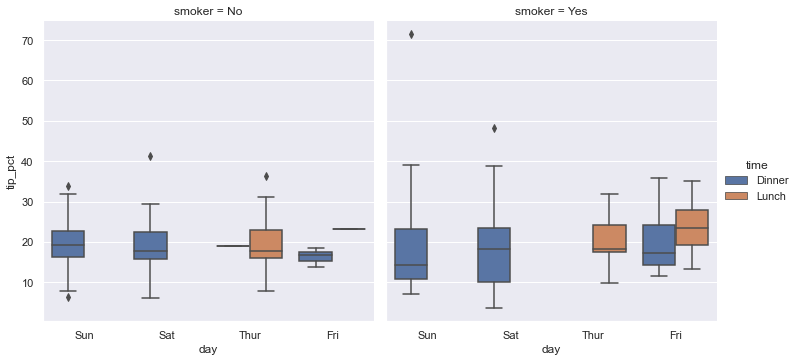

In [143]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

### <span style="color:black">Exercici 2 y Exercici 3</span>

__Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, "movies.dat". Mostreu-me la vostra creativitat, sorpreu-me amb el dataset "movies.dat" del exercici anterior :__</span><span style="color:blue"> __[X] Fet__</span>

In [610]:
file=pd.read_table('movies.dat', sep = '::', header = None, encoding='latin-1')
file[:3]

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [611]:
file.shape

(3883, 3)

In [612]:
file.columns

Int64Index([0, 1, 2], dtype='int64')

In [613]:
type(file)

pandas.core.frame.DataFrame

In [614]:
file.dtypes

0     int64
1    object
2    object
dtype: object

In [615]:
file.ndim

2

In [616]:
movies = file.rename(columns = {0: '0', 1: 'Movie', 2: "Categories"}, inplace = False)
movies.head(3)

,0,Movie,Categories
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [617]:
type(movies)

pandas.core.frame.DataFrame

In [618]:
movies['Year']=movies["Movie"].str[-6:-1]
movies

,0,Movie,Categories,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,(1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,(1995
2,3,Grumpier Old Men (1995),Comedy|Romance,(1995
3,4,Waiting to Exhale (1995),Comedy|Drama,(1995
4,5,Father of the Bride Part II (1995),Comedy,(1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,(2000
3879,3949,Requiem for a Dream (2000),Drama,(2000
3880,3950,Tigerland (2000),Drama,(2000
3881,3951,Two Family House (2000),Drama,(2000


In [619]:
movies['Year']=movies['Year'].astype('str')
type(movies['Year'])

pandas.core.series.Series

In [620]:
movies['Year'] = movies['Year'].str[1:]
movies.head(3)

,0,Movie,Categories,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995


In [621]:
movies['Movie'] = movies['Movie'].str[0:-7]
movies.head(3)

,0,Movie,Categories,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995


In [622]:
separado = movies["Categories"].str.split("|", expand=True)

In [623]:
movies["Category 1"]= separado[0]
movies["Category 2"]= separado[1]
movies["Category 3"]= separado[2]
movies["Category 4"]= separado[3]

In [700]:
movies

,0,Movie,Categories,Year,Category 1,Category 2,Category 3,Category 4
0,1,Toy Story,Animation|Children's|Comedy,1995,Animation,Children's,Comedy,None
1,2,Jumanji,Adventure|Children's|Fantasy,1995,Adventure,Children's,Fantasy,None
2,3,Grumpier Old Men,Comedy|Romance,1995,Comedy,Romance,None,None
3,4,Waiting to Exhale,Comedy|Drama,1995,Comedy,Drama,None,None
4,5,Father of the Bride Part II,Comedy,1995,Comedy,None,None,None
...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000,Comedy,None,None,None
3879,3949,Requiem for a Dream,Drama,2000,Drama,None,None,None
3880,3950,Tigerland,Drama,2000,Drama,None,None,None
3881,3951,Two Family House,Drama,2000,Drama,None,None,None


In [625]:
Categ=movies[['Category 1','Category 2', 'Category 3', 'Category 4']].stack().str.get_dummies().sum(level=0)

In [626]:
moviescopy=movies[['Movie','Year']].copy()

In [627]:
moviesCat= pd.concat([moviescopy, Categ], axis=1)
moviesCat.tail(10)

,Movie,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3873,Bamboozled,2000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3874,Bootmen,2000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3875,Digimon: The Movie,2000,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3876,Get Carter,2000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3877,Get Carter,1971,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3878,Meet the Parents,2000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,Requiem for a Dream,2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,Tigerland,2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,Two Family House,2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3882,"Contender, The",2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [628]:
MoviesCateg=moviesCat.groupby('Year').aggregate(sum)
MoviesCateg.tail()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Year,,,,,,,,,,,,,,,,,,
1996,37,22,7,20,115,23,19,150,4,2,12,7,6,48,14,44,8,1
1997,43,22,6,22,98,26,11,139,6,2,10,4,15,52,18,55,10,0
1998,44,16,8,18,112,25,18,166,2,3,15,3,10,58,17,51,4,1
1999,27,7,7,11,103,12,15,130,2,0,14,1,5,37,15,40,4,1
2000,19,6,8,9,69,8,8,55,1,0,8,1,1,17,10,25,2,0


In [629]:
MoviesCateg['Year']=MoviesCateg.index
MoviesCateg.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
Year,,,,,,,,,,,,,,,,,,,
1919,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,1919
1920,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1920
1921,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1921
1922,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1922
1923,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1923


In [630]:
MoviesCateg=MoviesCateg.reset_index(drop=True)
MoviesCateg.tail()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
76,37,22,7,20,115,23,19,150,4,2,12,7,6,48,14,44,8,1,1996
77,43,22,6,22,98,26,11,139,6,2,10,4,15,52,18,55,10,0,1997
78,44,16,8,18,112,25,18,166,2,3,15,3,10,58,17,51,4,1,1998
79,27,7,7,11,103,12,15,130,2,0,14,1,5,37,15,40,4,1,1999
80,19,6,8,9,69,8,8,55,1,0,8,1,1,17,10,25,2,0,2000


In [698]:
MoviesCateg['Suma']=MoviesCateg.iloc[:,0:17].sum(axis=1)
MoviesCateg.tail()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Suma
76,37,22,7,20,115,23,19,150,4,2,12,7,6,48,14,44,8,1,1996,538
77,43,22,6,22,98,26,11,139,6,2,10,4,15,52,18,55,10,0,1997,539
78,44,16,8,18,112,25,18,166,2,3,15,3,10,58,17,51,4,1,1998,570
79,27,7,7,11,103,12,15,130,2,0,14,1,5,37,15,40,4,1,1999,430
80,19,6,8,9,69,8,8,55,1,0,8,1,1,17,10,25,2,0,2000,247


In [632]:
MoviesCateg['Sci-Fi'].dtype

dtype('int64')

In [633]:
moviesCat.columns

Index(['Movie', 'Year', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [634]:
MovieCat = movies[['Category 1', 'Category 2','Category 3','Category 4']].copy()
MovieCat.head(3)

,Category 1,Category 2,Category 3,Category 4
0,Animation,Children's,Comedy,None
1,Adventure,Children's,Fantasy,None
2,Comedy,Romance,None,None


In [635]:
suma= pd.concat(
    [movies['Category 1'].value_counts(), movies['Category 2'].value_counts(), movies['Category 3'].value_counts(), 
     movies['Category 4'].value_counts()], axis=1).sum(axis=1)

suma.to_frame().astype(int)

,0
Drama,1603
Comedy,1200
Action,503
Horror,343
Adventure,283
Crime,211
Documentary,127
Thriller,489
Animation,105
Children's,251


In [636]:
type(suma)

pandas.core.series.Series

In [637]:
suma = suma.reset_index()
suma

,index,0
0,Drama,1603.0
1,Comedy,1200.0
2,Action,503.0
3,Horror,343.0
4,Adventure,283.0
5,Crime,211.0
6,Documentary,127.0
7,Thriller,489.0
8,Animation,105.0
9,Children's,251.0


In [638]:
suma = suma.rename(columns= {'index': 'Category', 0:'Quantity'})
suma

,Category,Quantity
0,Drama,1603.0
1,Comedy,1200.0
2,Action,503.0
3,Horror,343.0
4,Adventure,283.0
5,Crime,211.0
6,Documentary,127.0
7,Thriller,489.0
8,Animation,105.0
9,Children's,251.0


In [639]:
suma['Quantity'] = suma['Quantity'].astype(int)
suma.head()

,Category,Quantity
0,Drama,1603
1,Comedy,1200
2,Action,503
3,Horror,343
4,Adventure,283


In [640]:
suma['Percent']=round(((suma['Quantity'] / len(movies))*100), 2)

In [641]:
suma.head()

,Category,Quantity,Percent
0,Drama,1603,41.28
1,Comedy,1200,30.90
2,Action,503,12.95
3,Horror,343,8.83
4,Adventure,283,7.29


In [642]:
movies['Year'].value_counts()

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1928      3
1923      3
1922      2
1920      2
1921      1
Name: Year, Length: 81, dtype: int64

In [643]:
movies['Year'].dtypes
type(movies['Year'])

pandas.core.series.Series

In [644]:
Year=pd.to_numeric(movies['Year'])
Year

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
3878    2000
3879    2000
3880    2000
3881    2000
3882    2000
Name: Year, Length: 3883, dtype: int64

In [645]:
Year=Year.to_frame()
Year.rename(columns = {0:'Year'}, inplace=True)
Year.head()

,Year
0,1995
1,1995
2,1995
3,1995
4,1995


In [646]:
Years=Year[['Year']].value_counts()
Years

Year
1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1919      3
1920      2
1922      2
1921      1
Length: 81, dtype: int64

In [647]:
Years=Years.to_frame()
Years = Years.rename(columns= {0:'NumMovies'})
Years

,NumMovies
Year,
1996,345
1995,342
1998,337
1997,315
1999,283
...,...
1923,3
1919,3
1920,2


__1. ¿Cual es el porcentaje/peso de las categorías versus el total?.__

In [648]:
suma.describe()

,Quantity,Percent
count,18.000000,18.000000
mean,355.111111,9.143333
std,413.882463,10.658197
min,44.000000,1.130000
25%,107.750000,2.775000
50%,231.000000,5.945000
75%,436.750000,11.245000
max,1603.000000,41.280000


Text(0, 0.5, 'Porcentaje de categorías')

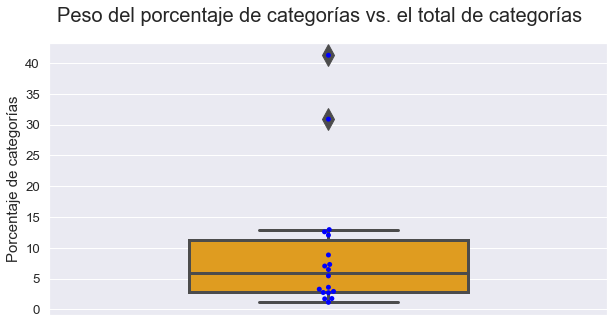

In [649]:
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.2)
sns.boxplot(y='Percent', data=suma,  color='orange', fliersize=15,  orient='v', linewidth=3 , width=0.5)
sns.swarmplot(y='Percent', data=suma, color="blue")
plt.suptitle('Peso del porcentaje de categorías vs. el total de categorías', fontsize=20)
plt.ylabel('Porcentaje de categorías',fontsize=15)

#Vemos que de las 18 categorías extistentes, 16 categorías tienen un reparto bastante similar del total de películas
#producidas (entre el 2,7% y el 11,2%). Solo hay 2 categorías que sobresalen notablemente de estos rangos: 
#el Drama (41,2%) y la Comedia (30.9%), que son los 2 outlayers que vemos en el gráfico.

Text(0, 0.5, 'Porcentaje de categorías')

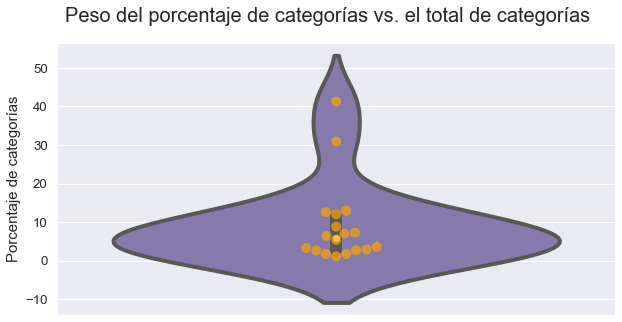

In [723]:
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.2)
sns.violinplot( y=suma["Percent"], linewidth=4, color="m" )
sns.swarmplot(y='Percent', data=suma, color="orange", size=10, alpha=0.7)

plt.suptitle('Peso del porcentaje de categorías vs. el total de categorías', fontsize=20)
plt.ylabel('Porcentaje de categorías',fontsize=15)


#El mismo concepto pero con gráfico de Violín. 

__2. ¿Cuales son las 4 categorías con las que se han producido más películas?__

In [650]:
TopCategories = suma[['Category', 'Quantity', 'Percent']][:4].copy()
TopCategories.loc[4]=["Otras Categ", round(sum(suma['Quantity'][5:]), 0), round(sum(suma['Percent'][5:]), 0)]
TopCategories

,Category,Quantity,Percent
0,Drama,1603,41.28
1,Comedy,1200,30.90
2,Action,503,12.95
3,Horror,343,8.83
4,Otras Categ,2460,63.00


In [651]:
x=TopCategories['Category']
y=TopCategories['Quantity']

Text(0, 0.5, 'Número Etiquetas')

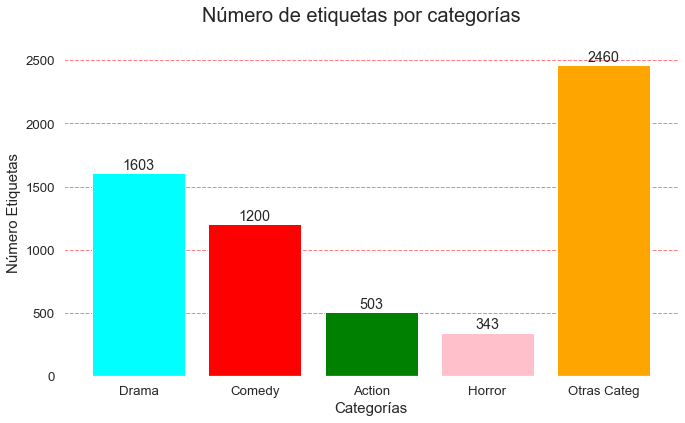

In [655]:
sns.set(rc={'figure.figsize':(11,6)}, font_scale=1.2)
plt.bar(x, y, align='center',  color=['cyan','red','green','pink','orange'])

for i,n in enumerate(y):
    plt.text( i , n + 10, n, ha='center', va='bottom')

#plt.grid(axis='x',linestyle='dashed', color='red')
ax = plt.axes()
ax.yaxis.grid(True, linestyle='dashed', color='red', alpha=0.5)    
ax.set_facecolor('white')
plt.suptitle('Número de etiquetas por categorías', fontsize=20)
plt.xlabel('Categorías', fontsize=15)
plt.ylabel('Número Etiquetas',fontsize=15)



#plt.savefig("NumEtiq_Categ.png",dpi=400, bbox_inches='tight') #guardamos el gráfico en formato png 
#plt.show()

# Observamos que la categoría que tiene más etiquetas es Drama (etiquetada en 1603 ocasiones), seguida de Comedia y, ya 
# a más distancia, de Acción y Terror. Drama y Comedia suman más etiquetas (2803) que las 14 últimas categorías (2460). 

__3. La historia del s.XX es, desgraciadamente, una historia de guerras. Veamos si eso se refleja en la producción de 
películas con esta temática.__

In [656]:
MoviesCateg.tail()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Suma
76,37,22,7,20,115,23,19,150,4,2,12,7,6,48,14,44,8,1,1996,538
77,43,22,6,22,98,26,11,139,6,2,10,4,15,52,18,55,10,0,1997,539
78,44,16,8,18,112,25,18,166,2,3,15,3,10,58,17,51,4,1,1998,570
79,27,7,7,11,103,12,15,130,2,0,14,1,5,37,15,40,4,1,1999,430
80,19,6,8,9,69,8,8,55,1,0,8,1,1,17,10,25,2,0,2000,247


In [657]:
MoviesCategories=MoviesCateg[['War','Year']].copy()
MoviesCategories.tail()

,War,Year
76,8,1996
77,10,1997
78,4,1998
79,4,1999
80,2,2000


In [658]:
MoviesCat=pd.DataFrame(columns=['Decada', 'Num. Eitquetas War'],index=range(8))
MoviesCat.iloc[0]=["1919-1930", sum(MoviesCategories['War'][0:10])]
MoviesCat.iloc[1]=["1931-1940", sum(MoviesCategories['War'][11:20])]
MoviesCat.iloc[2]=["1941-1950", sum(MoviesCategories['War'][21:30])]
MoviesCat.iloc[3]=["1951-1960", sum(MoviesCategories['War'][31:40])]
MoviesCat.iloc[4]=["1961-1970", sum(MoviesCategories['War'][41:50])]
MoviesCat.iloc[5]=["1971-1980", sum(MoviesCategories['War'][51:60])]
MoviesCat.iloc[6]=["1981-1990", sum(MoviesCategories['War'][61:70])]
MoviesCat.iloc[7]=["1991-2000", sum(MoviesCategories['War'][71:80])]
MoviesCat

,Decada,Num. Eitquetas War
0,1919-1930,2
1,1931-1940,4
2,1941-1950,11
3,1951-1960,13
4,1961-1970,13
5,1971-1980,7
6,1981-1990,25
7,1991-2000,54


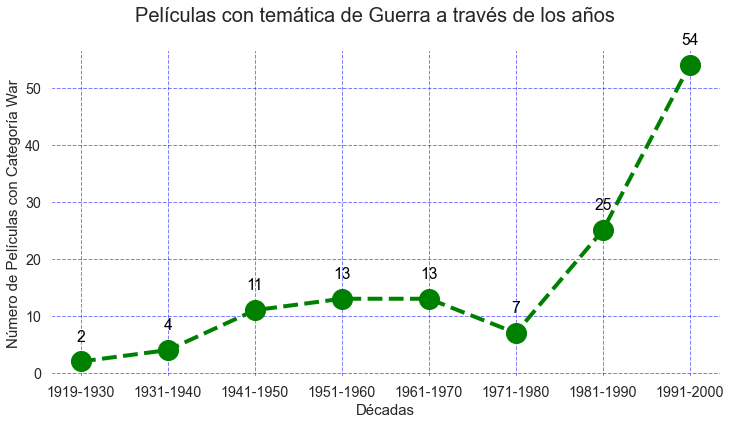

In [659]:
x=MoviesCat["Decada"]
y=MoviesCat["Num. Eitquetas War"]

sns.set(rc={'figure.figsize':(12,6)}, font_scale=1.3)
plt.scatter(x,y, s=400, c='green', zorder=2)
plt.plot(x,y,color='green', zorder=1, ls="--", lw="4")

ax = plt.axes()
ax.xaxis.grid(True, linestyle='dashed', color='blue', alpha=0.5)    
ax.yaxis.grid(True, linestyle='dashed', color='blue', alpha=0.5)    
ax.set_facecolor('white')

for i,n in enumerate(y):
    plt.text( i , n + 3, n, ha='center', va='bottom', color='black')

plt.xlabel("Décadas", fontsize=15)
plt.ylabel("Número de Películas con Categoría War", fontsize=15)
plt.suptitle("Películas con temática de Guerra a través de los años", fontsize=20)
plt.show()

# Hemos agrupado los años por décadas, para que el gráfico sea legible. Según éste, observamos que al parecer no existe una
# relación directa entre la producción de películas de guerra, y el periodo en que se producen. De la información de la que
# disponemos, observamos que hay un incremento significativo de producción de películas con esta temática a partir de los 
# años 80, pero como no podemos conocer la temática concreta de las mismas (WW1, WW2, Guerra fría, Guerra del Golfo, etc...)
# no podemos establecer dicha relación. Sí objervamos un ligero repunte en la decata de los 40 con respecto la década anterior
# (quizá por la WW2), o en la década de los 80 (se produjeron muchas películas con temáticas de la guerra de Vietnam), pero
# como comentamos anteriormente, no podemos saberlo.

__4. Años en los que se han producido más películas__

In [660]:
Years2 = Years[['NumMovies']][:5].copy()
Years2.loc['Otros años'] = [sum(Years['NumMovies'][6:])]
print(Years2)

            NumMovies
(1996,)           345
(1995,)           342
(1998,)           337
(1997,)           315
(1999,)           283
Otros años       2004


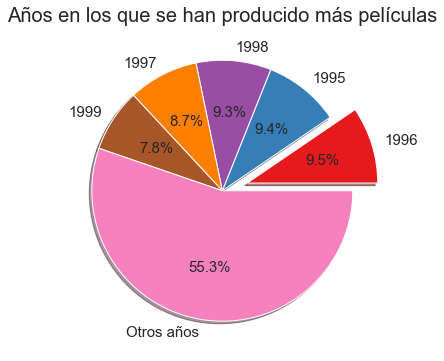

In [569]:
mylabels = ["1996", "1995", "1998", "1997", "1999", "Otros años"]


plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['font.size'] = 16

myexplode = [0.2, 0, 0, 0, 0, 0]
color=cm.Set1(np.arange(6)/6.)

plt.pie(Years2['NumMovies'], autopct='%1.1f%%', labels=mylabels, explode= myexplode, textprops={'fontsize': 15}, shadow=True,
       colors=color)

plt.title('Años en los que se han producido más películas', fontsize=20)
plt.show()

# Observamos que en solo 5 años (del 1995 al 99) se han producido el 45% del total de películas del dataset, fue un lustro
# especialmente productivo desde el punto de vista de producción cinematográfica. El 55% restante se produjeron en los 75
# los años restantes recogidos en el dataset.

__5. Hemos visto que la década de los 90 fue especialmente productiva para el cine ¿Cuales son las categorías más utilizadas en cada uno de los años de dicha década?__

In [837]:
MoviesCateg.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Suma
0,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,1919,5
1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1920,2
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1921,1
3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1922,2
4,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1923,3


In [662]:
Year2000 = MoviesCateg.loc[:, 'Year'] > '1990'
df_2000 = MoviesCateg.loc[Year2000]
df_2000.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Suma
71,6,4,2,3,24,1,1,26,3,0,3,2,4,9,6,7,1,0,1991,102
72,21,3,3,7,37,10,1,38,1,0,12,3,2,14,8,14,3,1,1992,177
73,25,10,4,12,47,8,5,81,3,1,9,3,7,18,10,22,5,2,1993,270
74,32,15,5,20,96,9,11,121,4,0,13,2,3,37,8,31,7,6,1994,414
75,45,25,8,22,89,18,22,158,4,1,16,4,8,49,18,43,12,4,1995,542


In [663]:
filter=df_2000.iloc[:, 0:18]
filter.rename(index={71:'1991',72:'1992', 73:'1993',74:'1994', 75:'1995',76:'1996', 77:'1997',78:'1998', 79:'1999',80:'2000'}, 
              inplace=True)
filter

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1991,6,4,2,3,24,1,1,26,3,0,3,2,4,9,6,7,1,0
1992,21,3,3,7,37,10,1,38,1,0,12,3,2,14,8,14,3,1
1993,25,10,4,12,47,8,5,81,3,1,9,3,7,18,10,22,5,2
1994,32,15,5,20,96,9,11,121,4,0,13,2,3,37,8,31,7,6
1995,45,25,8,22,89,18,22,158,4,1,16,4,8,49,18,43,12,4
1996,37,22,7,20,115,23,19,150,4,2,12,7,6,48,14,44,8,1
1997,43,22,6,22,98,26,11,139,6,2,10,4,15,52,18,55,10,0
1998,44,16,8,18,112,25,18,166,2,3,15,3,10,58,17,51,4,1
1999,27,7,7,11,103,12,15,130,2,0,14,1,5,37,15,40,4,1
2000,19,6,8,9,69,8,8,55,1,0,8,1,1,17,10,25,2,0


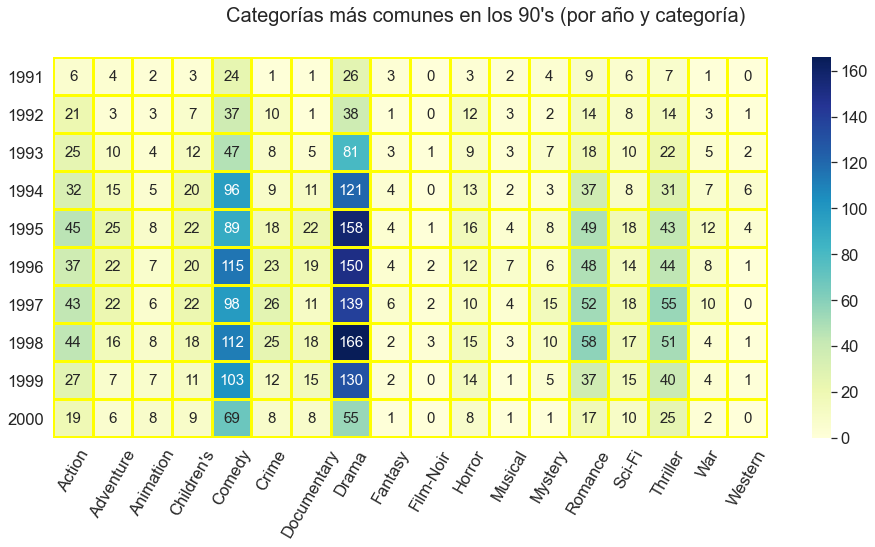

In [1208]:
df= pd.DataFrame(filter, columns=['Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama',
                                  'Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War',
                                  'Western'])
sns.set(rc={'figure.figsize':(16,7)}, font_scale=1.5)
plt.suptitle("Categorías más comunes en los 90's (por año y categoría)", fontsize=20)
a=sns.heatmap(df, linewidths=2, linecolor='yellow', annot=True, annot_kws={"size": 15}, cmap="YlGnBu", fmt='.0f')
a.set_yticklabels(a.get_yticklabels(), rotation=0)
a.set_xticklabels(a.get_xticklabels(), rotation=60)
plt.show()

# Gracias al mapa de calor, podemos ver qué candidad de cada una de las categorías por año (de la década de los 90), han
# sido las más utilizadas. Con diferencia, vemos que Drama y Comedia, y en segundo lugar Romance, Acción y Thriller, destacan  
# con respecto el resto de categorías, siendo los años 1994 al 1999 en los que se produjeron más películas con estas temáticas.
# También observamos que, a parte de estas 5 categorías, el resto tienen una distribución bastante similar (entre 0 y 20).

__6. Veamos la evolución del Top 5 de las categorías que más se repiten. Vamos a utilizar la función "XTICKS" para agrupar las décadas, en lugar de la indexación.__

In [664]:
x=MoviesCateg['Year']
y1=MoviesCateg['Action'].to_frame()
y2=MoviesCateg['Adventure'].to_frame()
y5=MoviesCateg['Comedy'].to_frame()
y8=MoviesCateg['Drama'].to_frame()
y11=MoviesCateg['Horror'].to_frame()

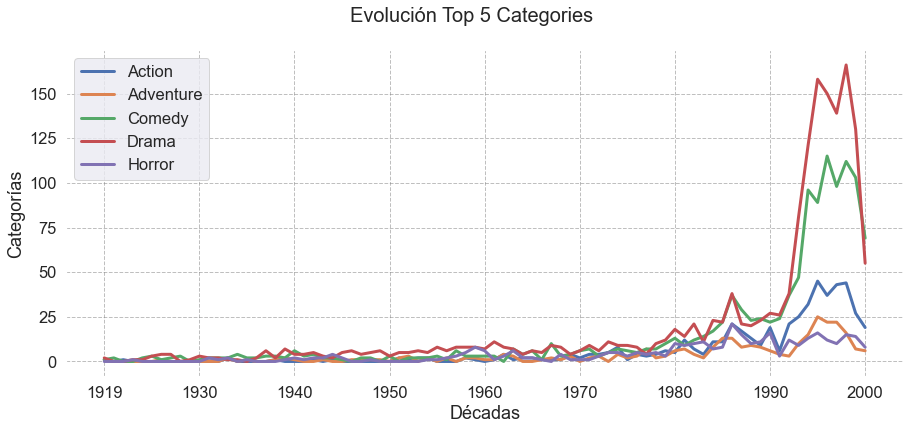

In [665]:
sns.set(rc={'figure.figsize':(15, 6)}, font_scale=1.5)

ax = plt.axes()
ax.xaxis.grid(True, linestyle='dashed', color='grey', alpha=0.5)    
ax.yaxis.grid(True, linestyle='dashed', color='grey', alpha=0.5)    
ax.set_facecolor('white')

ax = plt.subplot()
ax.plot(x, y1,linewidth=3)
ax.plot(x, y2,linewidth=3)
ax.plot(x, y5,linewidth=3)
ax.plot(x, y8,linewidth=3)
ax.plot(x, y11,linewidth=3)

ax.set_xticks(ax.get_xticks()[::10]) 

plt.ylabel("Categorías")
plt.xlabel("Décadas")
plt.suptitle("Evolución Top 5 Categories", fontsize=20)
plt.legend(loc='upper left', labels=['Action','Adventure', 'Comedy', 'Drama', 'Horror'])
plt.show()

# En el gráfico vemos como el top 5 de categorías tienen un uso bastante similar a lo largo de los años. No es hasta los 
# años 80 que observamos un ligero incremento (duplicando y triplicando su uso hasta el momento). En la siguiente década de 
# los 90, vemos que crecen igualmente todas las categorías, pero son las categorías de Drama y Comedia las que crecen 
# vertiginosamente, aunque una más que otra: Drama multiplica por 5 su número de etiquetas (respecto la década anterior), 
# mientras que Comedia lo multiplica por algo mas de 3 veces (especialmente entre los años '95 y '99).

__7. ¿En qué década se utilizan más etiquetas? Vamos a utilizar los dos métodos de agregación de los años en décadas: Indexación y la función 'set_xticks'.__

In [ ]:
# INDEXACIÓN

In [666]:
Cat=pd.DataFrame(columns=['Decada', 'Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama',
                          'Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War', 'Western', 
                          'Suma'], 
                 index=range(8))

In [667]:
Cat.iloc[0]=["1919-1930", sum(MoviesCateg['Action'][0:10]), sum(MoviesCateg['Adventure'][0:10]), 
             sum(MoviesCateg['Animation'][0:10]), sum(MoviesCateg["Children's"][0:10]), sum(MoviesCateg['Comedy'][0:10]), 
             sum(MoviesCateg['Crime'][0:10]), sum(MoviesCateg['Documentary'][0:10]), sum(MoviesCateg['Drama'][0:10]),
             sum(MoviesCateg['Fantasy'][0:10]),sum(MoviesCateg['Film-Noir'][0:10]),sum(MoviesCateg['Horror'][0:10]), 
             sum(MoviesCateg['Musical'][0:10]), sum(MoviesCateg['Mystery'][0:10]),sum(MoviesCateg['Romance'][0:10]),
             sum(MoviesCateg['Sci-Fi'][0:10]),sum(MoviesCateg['Thriller'][0:10]),sum(MoviesCateg['War'][0:10]),
             sum(MoviesCateg['Western'][0:10]), sum(MoviesCateg['Suma'][0:10])]
Cat.iloc[1]=["1931-1940", sum(MoviesCateg['Action'][11:20]), sum(MoviesCateg['Adventure'][11:20]), 
             sum(MoviesCateg['Animation'][11:20]), sum(MoviesCateg["Children's"][11:20]), sum(MoviesCateg['Comedy'][11:20]), 
             sum(MoviesCateg['Crime'][11:20]), sum(MoviesCateg['Documentary'][11:20]), sum(MoviesCateg['Drama'][11:20]),
             sum(MoviesCateg['Fantasy'][11:20]),sum(MoviesCateg['Film-Noir'][11:20]),sum(MoviesCateg['Horror'][11:20]), 
             sum(MoviesCateg['Musical'][11:20]), sum(MoviesCateg['Mystery'][11:20]),sum(MoviesCateg['Romance'][11:20]),
             sum(MoviesCateg['Sci-Fi'][11:20]),sum(MoviesCateg['Thriller'][11:20]),sum(MoviesCateg['War'][11:20]),
             sum(MoviesCateg['Western'][11:20]), sum(MoviesCateg['Suma'][11:20])]
Cat.iloc[2]=["1941-1950", sum(MoviesCateg['Action'][21:30]), sum(MoviesCateg['Adventure'][21:30]), 
             sum(MoviesCateg['Animation'][21:30]), sum(MoviesCateg["Children's"][21:30]), sum(MoviesCateg['Comedy'][21:30]), 
             sum(MoviesCateg['Crime'][21:30]), sum(MoviesCateg['Documentary'][21:30]), sum(MoviesCateg['Drama'][21:30]),
             sum(MoviesCateg['Fantasy'][21:30]),sum(MoviesCateg['Film-Noir'][21:30]),sum(MoviesCateg['Horror'][21:30]), 
             sum(MoviesCateg['Musical'][21:30]), sum(MoviesCateg['Mystery'][21:30]),sum(MoviesCateg['Romance'][21:30]),
             sum(MoviesCateg['Sci-Fi'][21:30]),sum(MoviesCateg['Thriller'][21:30]),sum(MoviesCateg['War'][21:30]),
             sum(MoviesCateg['Western'][21:30]), sum(MoviesCateg['Suma'][21:30])]
Cat.iloc[3]=["1951-1960", sum(MoviesCateg['Action'][31:40]), sum(MoviesCateg['Adventure'][31:40]), 
             sum(MoviesCateg['Animation'][31:40]), sum(MoviesCateg["Children's"][31:40]), sum(MoviesCateg['Comedy'][31:40]), 
             sum(MoviesCateg['Crime'][31:40]), sum(MoviesCateg['Documentary'][31:40]), sum(MoviesCateg['Drama'][31:40]),
             sum(MoviesCateg['Fantasy'][31:40]),sum(MoviesCateg['Film-Noir'][31:40]),sum(MoviesCateg['Horror'][31:40]), 
             sum(MoviesCateg['Musical'][31:40]), sum(MoviesCateg['Mystery'][31:40]),sum(MoviesCateg['Romance'][31:40]),
             sum(MoviesCateg['Sci-Fi'][31:40]),sum(MoviesCateg['Thriller'][31:40]),sum(MoviesCateg['War'][31:40]),
             sum(MoviesCateg['Western'][31:40]), sum(MoviesCateg['Suma'][31:40])]
Cat.iloc[4]=["1961-1970", sum(MoviesCateg['Action'][41:50]), sum(MoviesCateg['Adventure'][41:50]), 
             sum(MoviesCateg['Animation'][41:50]), sum(MoviesCateg["Children's"][41:50]), sum(MoviesCateg['Comedy'][41:50]), 
             sum(MoviesCateg['Crime'][41:50]), sum(MoviesCateg['Documentary'][41:50]), sum(MoviesCateg['Drama'][41:50]),
             sum(MoviesCateg['Fantasy'][41:50]),sum(MoviesCateg['Film-Noir'][41:50]),sum(MoviesCateg['Horror'][41:50]), 
             sum(MoviesCateg['Musical'][41:50]), sum(MoviesCateg['Mystery'][41:50]),sum(MoviesCateg['Romance'][41:50]),
             sum(MoviesCateg['Sci-Fi'][41:50]),sum(MoviesCateg['Thriller'][41:50]),sum(MoviesCateg['War'][41:50]),
             sum(MoviesCateg['Western'][41:50]), sum(MoviesCateg['Suma'][41:50])]
Cat.iloc[5]=["1971-1980", sum(MoviesCateg['Action'][51:60]), sum(MoviesCateg['Adventure'][51:60]), 
             sum(MoviesCateg['Animation'][51:60]), sum(MoviesCateg["Children's"][51:60]), sum(MoviesCateg['Comedy'][51:60]), 
             sum(MoviesCateg['Crime'][51:60]), sum(MoviesCateg['Documentary'][51:60]), sum(MoviesCateg['Drama'][51:60]),
             sum(MoviesCateg['Fantasy'][51:60]),sum(MoviesCateg['Film-Noir'][51:60]),sum(MoviesCateg['Horror'][51:60]), 
             sum(MoviesCateg['Musical'][51:60]), sum(MoviesCateg['Mystery'][51:60]),sum(MoviesCateg['Romance'][51:60]),
             sum(MoviesCateg['Sci-Fi'][51:60]),sum(MoviesCateg['Thriller'][51:60]),sum(MoviesCateg['War'][51:60]),
             sum(MoviesCateg['Western'][51:60]), sum(MoviesCateg['Suma'][51:60])]
Cat.iloc[6]=["1981-1990", sum(MoviesCateg['Action'][61:70]), sum(MoviesCateg['Adventure'][61:70]), 
             sum(MoviesCateg['Animation'][61:70]), sum(MoviesCateg["Children's"][61:70]), sum(MoviesCateg['Comedy'][61:70]), 
             sum(MoviesCateg['Crime'][61:70]), sum(MoviesCateg['Documentary'][61:70]), sum(MoviesCateg['Drama'][61:70]),
             sum(MoviesCateg['Fantasy'][61:70]),sum(MoviesCateg['Film-Noir'][61:70]),sum(MoviesCateg['Horror'][61:70]), 
             sum(MoviesCateg['Musical'][61:70]), sum(MoviesCateg['Mystery'][61:70]),sum(MoviesCateg['Romance'][61:70]),
             sum(MoviesCateg['Sci-Fi'][61:70]),sum(MoviesCateg['Thriller'][61:70]),sum(MoviesCateg['War'][61:70]),
             sum(MoviesCateg['Western'][61:70]), sum(MoviesCateg['Suma'][61:70])]
Cat.iloc[7]=["1991-2000", sum(MoviesCateg['Action'][71:80]), sum(MoviesCateg['Adventure'][71:80]), 
             sum(MoviesCateg['Animation'][71:80]), sum(MoviesCateg["Children's"][71:80]), sum(MoviesCateg['Comedy'][71:80]), 
             sum(MoviesCateg['Crime'][71:80]), sum(MoviesCateg['Documentary'][71:80]), sum(MoviesCateg['Drama'][71:80]),
             sum(MoviesCateg['Fantasy'][71:800]),sum(MoviesCateg['Film-Noir'][71:80]),sum(MoviesCateg['Horror'][71:80]), 
             sum(MoviesCateg['Musical'][71:80]), sum(MoviesCateg['Mystery'][71:80]),sum(MoviesCateg['Romance'][71:80]),
             sum(MoviesCateg['Sci-Fi'][71:80]),sum(MoviesCateg['Thriller'][71:80]),sum(MoviesCateg['War'][71:80]),
             sum(MoviesCateg['Western'][71:80]), sum(MoviesCateg['Suma'][71:80])]
Cat

,Decada,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Suma
0,1919-1930,2,2,0,0,14,1,0,16,0,0,1,1,0,2,1,2,2,0,44
1,1931-1940,3,6,2,4,22,3,0,23,0,1,7,10,3,15,1,8,4,1,112
2,1941-1950,2,5,8,10,16,8,0,40,0,17,12,12,9,10,0,15,11,4,175
3,1951-1960,10,13,4,8,22,6,1,59,4,7,20,16,5,17,29,15,13,7,249
4,1961-1970,17,15,5,17,38,5,1,62,2,2,20,18,5,10,12,20,13,16,262
5,1971-1980,39,26,7,23,57,15,2,78,4,1,34,9,6,8,30,21,7,14,367
6,1981-1990,105,72,14,30,187,20,9,193,24,4,102,10,12,49,61,52,25,3,969
7,1991-2000,280,124,50,135,721,132,103,1009,30,9,104,29,60,322,114,307,54,16,3582


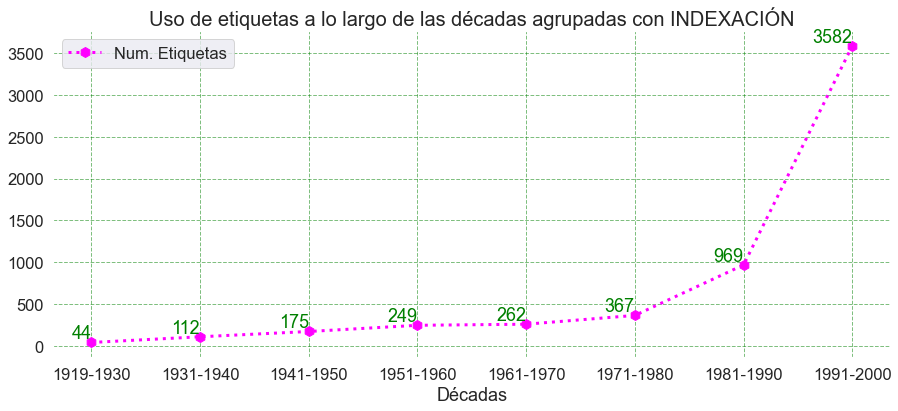

In [668]:
x=Cat['Decada']
y=Cat['Suma'].astype('int')

sns.set(rc={'figure.figsize':(15, 6)}, font_scale=1.5)

ax = plt.axes()
ax.xaxis.grid(True, linestyle='dashed', color='green', alpha=0.5)    
ax.yaxis.grid(True, linestyle='dashed', color='green', alpha=0.5)    
ax.set_facecolor('white')

for i,n in enumerate(y):
    plt.text(i, n + 1, n, ha='right', va='bottom', color='green')

plt.plot( x, y, linestyle=':', marker='h', markerfacecolor='magenta', markersize=10, color='magenta', linewidth=3, 
        label="Num. Etiquetas")
plt.xlabel("Décadas")
plt.title("Uso de etiquetas a lo largo de las décadas agrupadas con INDEXACIÓN", fontsize=20)
plt.legend()

In [121]:
# FUNCIÓN 'SET_XTICKS'

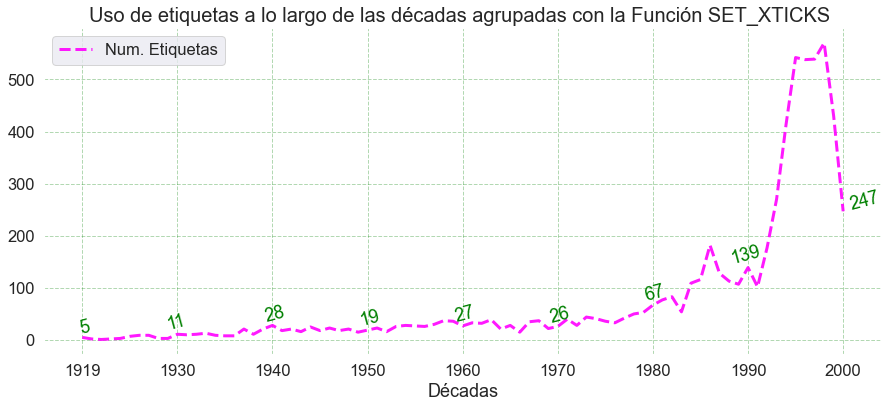

In [688]:
sns.set(rc={'figure.figsize':(15, 6)}, font_scale=1.5)

ax=plt.subplot()
ax.plot(MoviesCateg['Year'], MoviesCateg['Suma'], markersize=20, color='magenta', linewidth=3, alpha=0.9, ls='--',
        label='Num. Etiquetas')
ax.set_xticks(ax.get_xticks()[::10]) # Este código nos ahorra hacer toda la indexación (agrupar por décadas) del gráfico 
                                     # anterior, aunque no suma los datos comprendidos en dichas décadas (la indexación SÍ)

ax.text(1, 5, "5", ha='right', va='bottom', color='green', rotation = 15)
ax.text(11, 11, "11", ha='right', va='bottom', color='green', rotation = 15)
ax.text(21.5, 28, "28", ha='right', va='bottom', color='green', rotation = 15)
ax.text(31.5, 19, "19", ha='right', va='bottom', color='green', rotation = 15)
ax.text(41.5, 27, "27", ha='right', va='bottom', color='green', rotation = 15)
ax.text(51.5, 26, "26", ha='right', va='bottom', color='green', rotation = 15)
ax.text(61.5, 67, "67", ha='right', va='bottom', color='green', rotation = 15)
ax.text(71.5, 139, "139", ha='right', va='bottom', color='green', rotation = 15)
ax.text(84, 243, "247", ha='right', va='bottom', color='green', rotation = 15) 
    
ax.xaxis.grid(True, linestyle='dashed', color='green', alpha=0.3)    
ax.yaxis.grid(True, linestyle='dashed', color='green', alpha=0.3)    
ax.set_facecolor('white')

plt.xlabel("Décadas")
plt.title("Uso de etiquetas a lo largo de las décadas agrupadas con la Función SET_XTICKS ", fontsize=20)
plt.legend()

__9. ¿Cuantas películas han sido etiquetadas con 4, 3, 2, 1 o ninguna categorías?.__

In [409]:
moviesCat.tail()

,Movie,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3878,Meet the Parents,2000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,Requiem for a Dream,2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,Tigerland,2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,Two Family House,2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3882,"Contender, The",2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [523]:
moviesCat['Count']=moviesCat.iloc[:,2:20].sum(axis=1)
moviesCat.head()

,Movie,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Count
0,Toy Story,1995,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,Jumanji,1995,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,Grumpier Old Men,1995,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,2
3,Waiting to Exhale,1995,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,2
4,Father of the Bride Part II,1995,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [423]:
Agregado=moviesCat.groupby('Count').aggregate(sum)
Agregado.tail()

#De entrada ya vemos que no hay ninguna película que no esté etiquetada, todas están clasificadas como mínimo, en una categoría.

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Count,,,,,,,,,,,,,,,,,,
1,65,17,2,5,521,26,116,843,1,10,178,18,10,40,27,101,12,33
2,204,95,47,132,501,99,11,573,12,15,120,43,50,302,120,224,78,18
3,165,112,36,81,134,60,0,155,34,16,35,39,32,100,87,121,41,15
4,69,59,20,33,44,26,0,32,19,3,10,13,14,26,39,43,8,2


In [424]:
Agregado['Sum']=Agregado.iloc[:,0:18].sum(axis=1)
Agregado.head(20)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Sum
Count,,,,,,,,,,,,,,,,,,,
1,65,17,2,5,521,26,116,843,1,10,178,18,10,40,27,101,12,33,2025
2,204,95,47,132,501,99,11,573,12,15,120,43,50,302,120,224,78,18,2644
3,165,112,36,81,134,60,0,155,34,16,35,39,32,100,87,121,41,15,1263
4,69,59,20,33,44,26,0,32,19,3,10,13,14,26,39,43,8,2,460


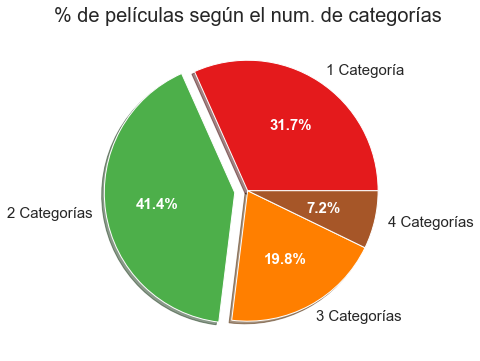

In [483]:
from matplotlib import cm

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['font.size'] = 16
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

color=cm.Set1(np.arange(4)/4.)

mylabels = ["1 Categoría", "2 Categorías", "3 Categorías", "4 Categorías"]
myexplode = [0, 0.1, 0, 0]

wedges, texts, autotexts = ax.pie(Agregado['Sum'], autopct='%1.1f%%', labels=mylabels, explode= myexplode, textprops={'fontsize': 15}, 
        shadow=True, colors=color)

plt.title('% de películas según el num. de categorías', fontsize=20)
plt.setp(autotexts, size=15, weight="bold", color='w')
plt.show()

# El gráfico pieplot es perfecto para mostrar porcentajes de variables categóricas (cuando no son más de 6 o 7 variables). 
# Vemos claramente como el 41% de las películas han sido clasificadas en 2 categorías, seguidas por las que están clasificadas
# con tan solo una categoría (el 31,7%). 